In [1]:
# Importing necessary libraries

# Data Management
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression
from sklearn.linear_model import LinearRegression

# Model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Q-Q plot
import pylab
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

### Load the data

In [2]:
df = pd.read_csv("Ecommerce Customers")
df.head(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


### Understand the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
df.isnull().sum().to_frame().rename(columns={0: 'No. of Null values'})

,No. of Null values
Email,0
Address,0
Avatar,0
Avg. Session Length,0
Time on App,0
Time on Website,0
Length of Membership,0
Yearly Amount Spent,0


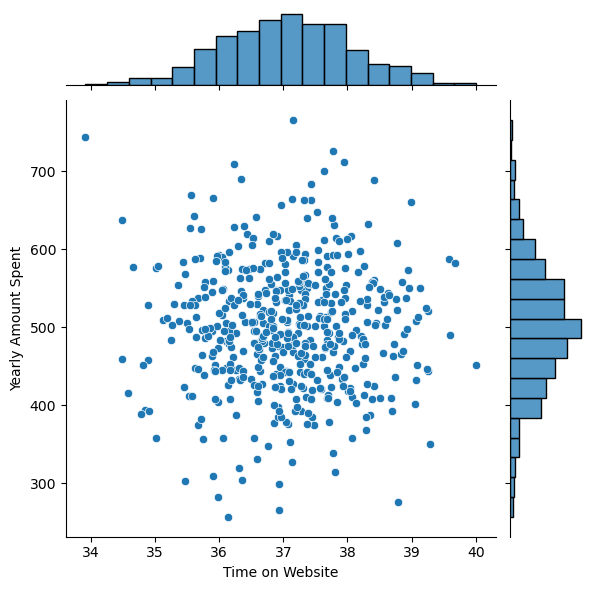

In [6]:
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data=df)

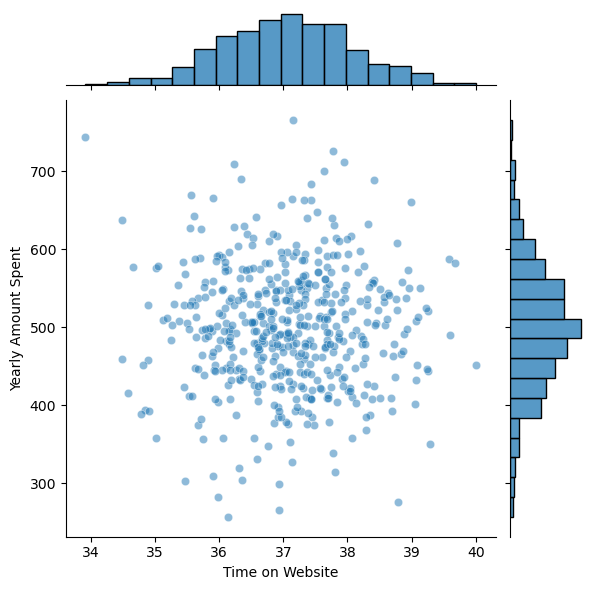

In [7]:
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data=df, alpha=0.5)

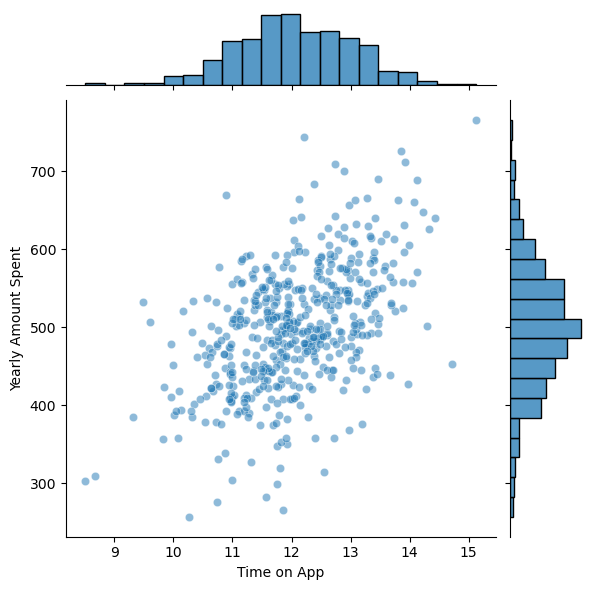

In [8]:
sns.jointplot(x="Time on App", y="Yearly Amount Spent", data=df, alpha=0.5)

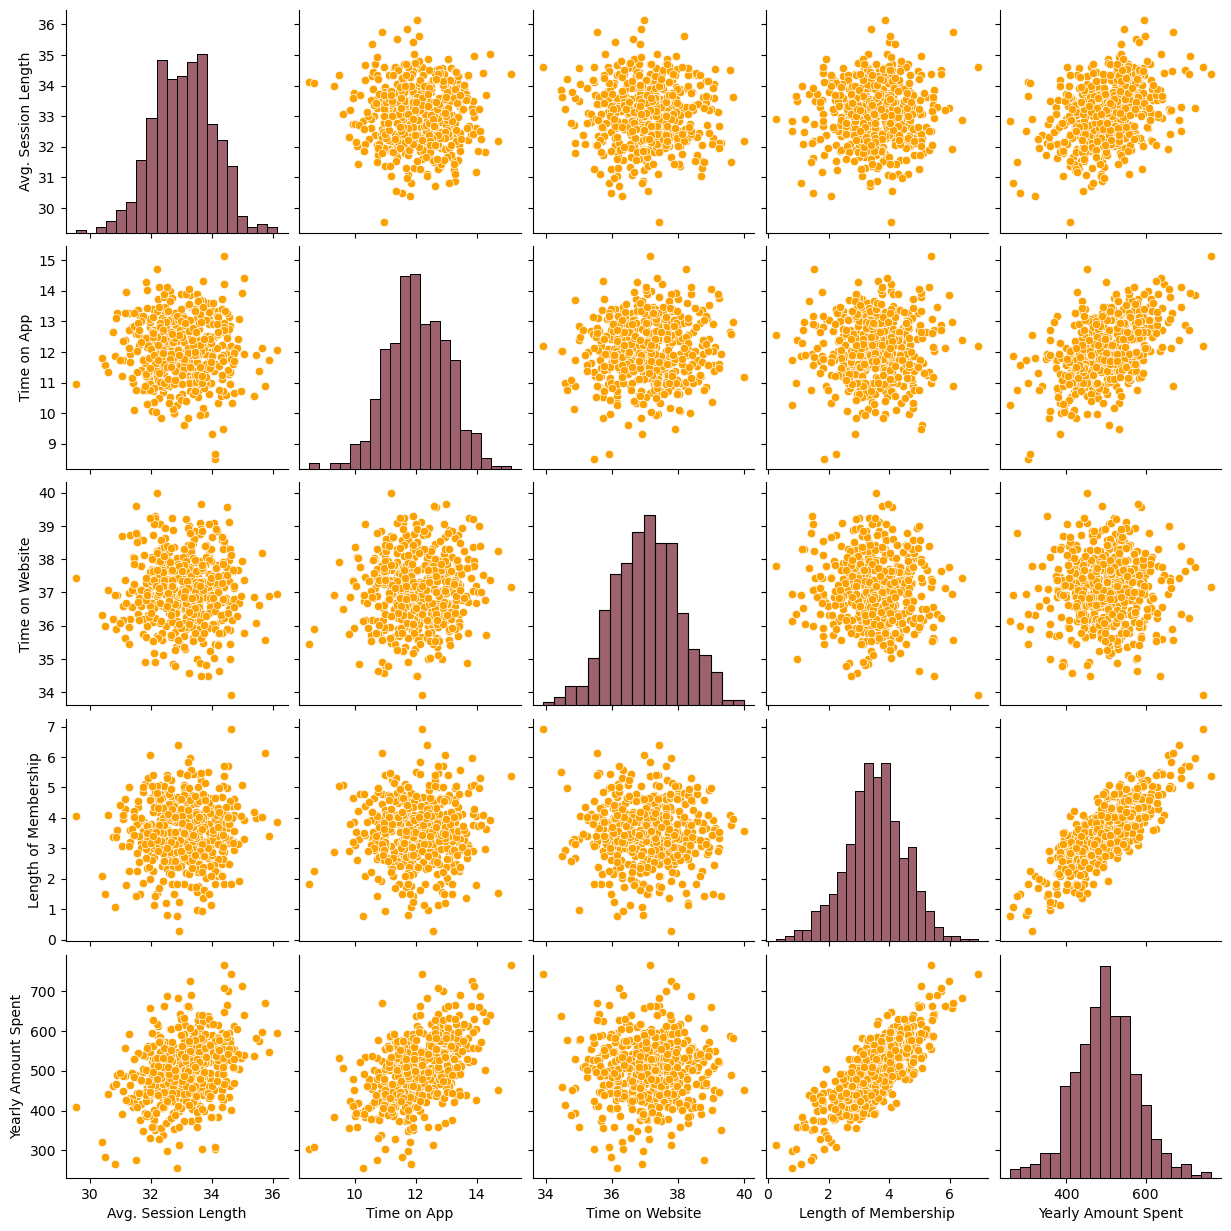

In [9]:
t = sns.pairplot(df, kind="scatter", plot_kws={"alpha":0.4})
t.map_upper(sns.scatterplot,color= '#FDA101')
t.map_lower(sns.scatterplot, color="#FDA101")
t.map_diag(sns.histplot, color="#B65050")

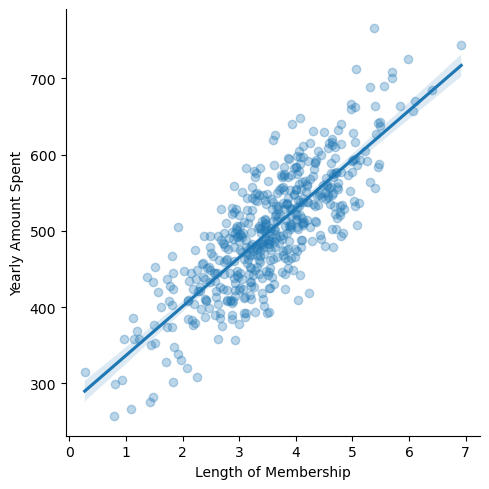

In [10]:
sns.lmplot(x="Length of Membership", y="Yearly Amount Spent", data=df, scatter_kws={"alpha":0.3})

In [11]:
df_new = df[["Time on Website", "Time on App", "Avg. Session Length", "Length of Membership", "Yearly Amount Spent"]]

In [12]:
correlation_matrix = df_new.corr()
correlation_matrix

,Time on Website,Time on App,Avg. Session Length,Length of Membership,Yearly Amount Spent
Time on Website,1.000000,0.082388,-0.034987,-0.047582,-0.002641
Time on App,0.082388,1.000000,-0.027826,0.029143,0.499328
Avg. Session Length,-0.034987,-0.027826,1.000000,0.060247,0.355088
Length of Membership,-0.047582,0.029143,0.060247,1.000000,0.809084
Yearly Amount Spent,-0.002641,0.499328,0.355088,0.809084,1.000000


In [13]:
correlation_with_target = correlation_matrix["Yearly Amount Spent"]
correlation_with_target

Time on Website        -0.002641
Time on App             0.499328
Avg. Session Length     0.355088
Length of Membership    0.809084
Yearly Amount Spent     1.000000
Name: Yearly Amount Spent, dtype: float64

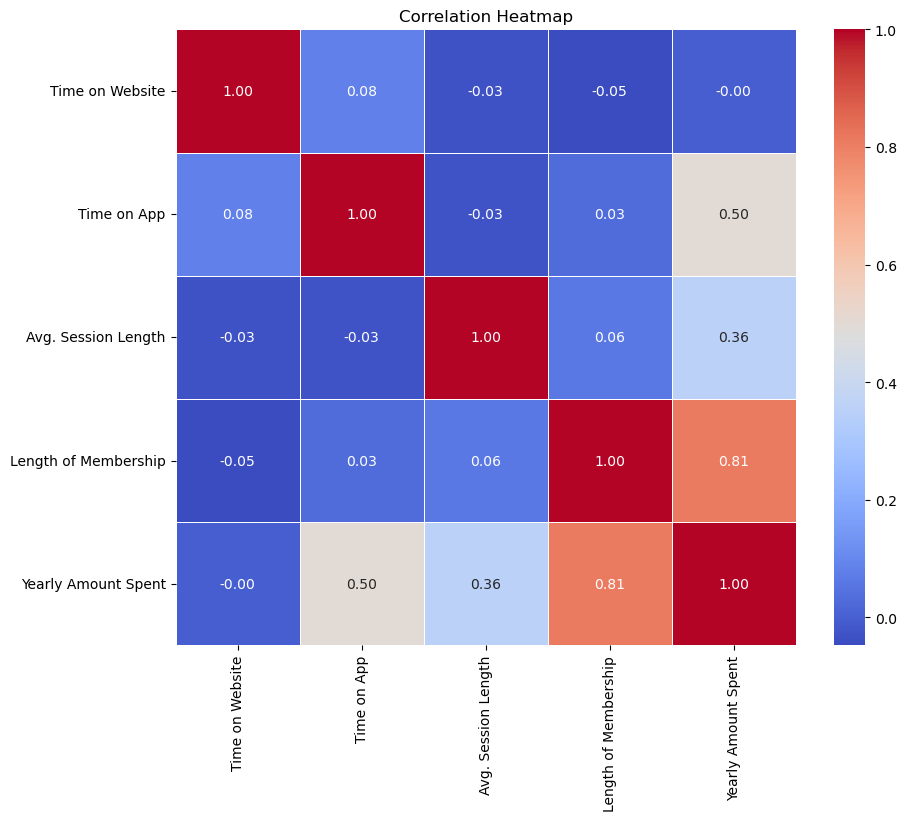

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Training a Linear Regression model

Let's now begin to train our regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case, the Price column. We will toss out the Email, Address and Avatar column because it only has text info that the linear regression model can't use.

In [16]:
X = df[["Time on Website", "Time on App", "Avg. Session Length", "Length of Membership"]]
y = df["Yearly Amount Spent"]

### Train Test Split

Now, let's split the data into a training set and a testing set. We will train our model on the training set and then use the test set to evaluate the model.

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
X_train

,Time on Website,Time on App,Avg. Session Length,Length of Membership
5,34.476878,12.026925,33.871038,5.493507
116,36.701052,12.011022,33.925795,2.753424
45,39.131097,12.170525,34.555768,3.663105
16,34.894093,11.733862,32.125387,3.136133
462,37.211153,11.233415,33.503810,2.320550
...,...,...,...,...
106,36.152462,12.190474,32.291756,3.781823
270,38.655095,12.956277,34.006489,3.275734
348,34.897828,10.886921,31.812483,3.128639
435,37.023479,14.132893,32.259973,3.762070


### Train the model

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train, y_train)

LinearRegression()

In [21]:
lm.coef_

array([ 0.45914788, 38.59713548, 25.72425621, 61.67473243])

In [32]:
lm.intercept_

-1050.6536746645738

In [22]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=["Coef"])
print(cdf)

                           Coef
Time on Website        0.459148
Time on App           38.597135
Avg. Session Length   25.724256
Length of Membership  61.674732


In [23]:
predictions = lm.predict(X_test)

In [24]:
predictions

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

Text(0.5, 1.0, 'Evaluation of our LM model')

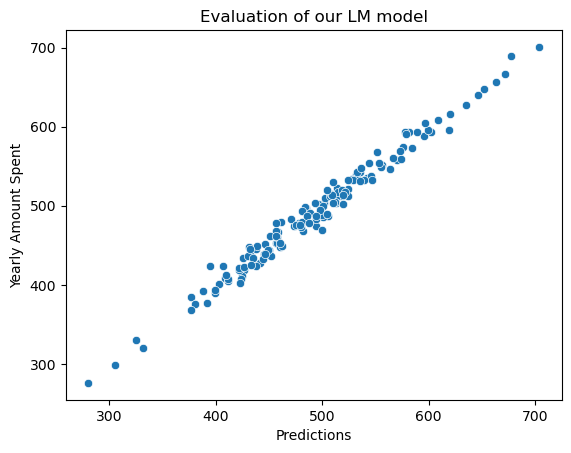

In [25]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel("Predictions")
plt.title("Evaluation of our LM model")

In [27]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))
print("Mean Squared Error: ", mean_squared_error(y_test, predictions))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error:  8.426091641432091
Mean Squared Error:  103.9155413650332
RMSE:  10.19389726086315


Let's calculate the `residuals`.

Residuals are the differences between the actual values of the target variable and the values predicted by the model.

Residual = Actual Value − Predicted Value


In [29]:
residuals = y_test - predictions

A residuals distribution plot helps diagnose the quality of a regression model by showing how the residuals (errors) are distributed. 
- Ideally, residuals should be normally distributed, centered around zero, and have constant variance. <br/>
- Deviations from this pattern can indicate potential issues with the model, such as bias, non-linearity, heteroscedasticity, or the presence of outliers

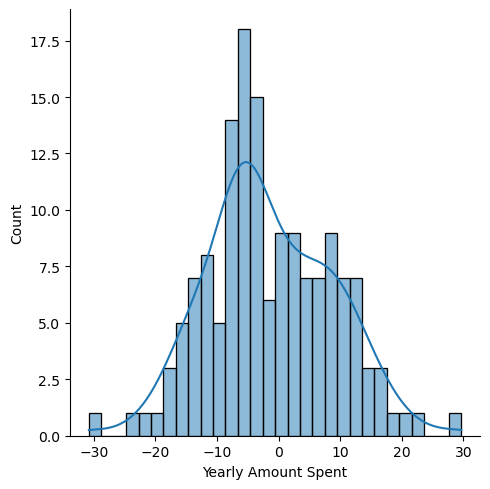

In [30]:
sns.displot(residuals, bins=30, kde=True)

1. Centering Around Zero:
The residuals are centered around zero, with a slight skew to the right. This suggests that, on average, the model's predictions are reasonably accurate, but there may be some systematic error that causes a slight bias toward under-predicting the "Yearly Amount Spent."

2. Normality:
The shape of the residuals approximates a normal distribution, but with some deviations. The peak near zero indicates that most residuals are small, meaning the model frequently makes accurate predictions. The tails, particularly on the right, suggest that there are some predictions with larger errors.

3. Spread (Variance):
The residuals are spread out more on the right-hand side, meaning there are some instances where the model overestimates the "Yearly Amount Spent" by a significant amount (positive residuals). On the left side, there are fewer extreme negative residuals (underestimates).

4. Skewness:
The distribution is slightly right-skewed, which indicates that the model tends to under-predict more often than it over-predicts, but the over-predictions are more extreme when they occur.

5. Presence of Outliers:
The tails of the distribution, especially the right tail, suggest the presence of outliers or extreme residuals where the model's predictions differ significantly from the actual values.

Using a Q-Q plot to check whether the residuals follows the normal distribution.

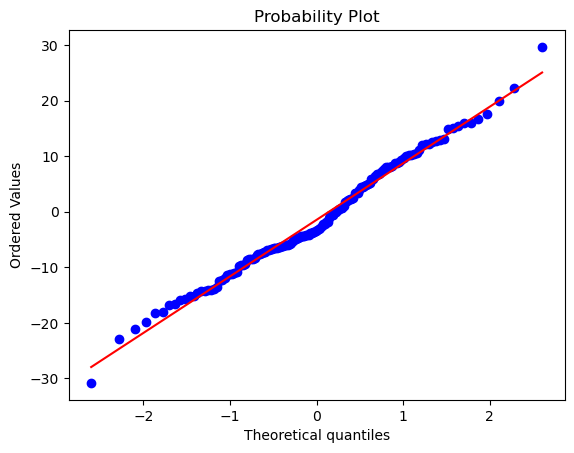

In [31]:
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

1. Normality: 
The residuals are mostly normally distributed, but with some deviations, particularly at the tails. This indicates that while the model is generally fitting well, there are some extreme values that the model is not capturing perfectly.
2. Skewness and Tails: 
The slight S-shape and the deviation at the tails suggest mild skewness and heavy tails, which could indicate that the model might benefit from adjustments to better handle these extremes.

Next Steps: Consider investigating the outliers or extreme residuals and potentially exploring transformations or alternative models if these deviations are problematic for the specific application.